# ICE - 4701 Advanced Machine Learning
# **Assignment 2**

## Author: Ebube Glory Ogbonda 
## Student ID : 500654313
|   |   |
|---|---|
| **Module:**        | ICE-4701 |
| **Department:**    | School of Computer Science and Electronic Engineering |
| **Module credit:** |20 |
| **Organiser:**     |Dr Cameron Grey |
| **Date out:**      | 18 April 2023 |

**Due date: Friday, 05 May 2023 17:00**

 **Instructions.**
>
> • Solve all problems.
>
> • Possible marks: 100.
>
> • Submit ONE file with your Python code. The code should produce the
> desired output. If you need to include a comment, place it as a
> comment in the Python file. You can submit a Jupyter Notebooks or a
> plain py file.
> Submit also all images that your code needs in order to
>run. You don’t have to submit the csv files with the data
>
> • Note: Points will be taken off for code which is long, unreadable, or inefficient.

_______________________________________________________

**Importing relevant packages**

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **Problem 1. Multi-label classification**


(a) Prepare a function named binary_relevance_ldc which will implement the Binary Relevance
Method for multilabel classification. The classifier model for the binary classification should be the
Linear Discriminant Classifier (LDC). The input should be: training data (N × n), training labels
(N × c, containing integers 1, 2, 3, ...), and testing data (Ntest × n). The function should return a
binary matrix of assigned labels of size Ntest × c

In [2]:
def binary_relevance_ldc(train_data, train_binary_labels, test_data):
    N, n = train_data.shape
    N_test, _ = test_data.shape
    c = train_binary_labels.shape[1]

    ldc_classifiers = []
    for j in range(c):
        ldc = LinearDiscriminantAnalysis()
        ldc.fit(train_data, train_binary_labels[:, j])
        ldc_classifiers.append(ldc)

    assigned_labels = np.zeros((N_test, c))
    for i, ldc_classifier in enumerate(ldc_classifiers):
        predictions = ldc_classifier.predict(test_data)
        assigned_labels[:, i] = predictions

    return assigned_labels

(b) Subsequently, write a function named adaptive_knn which will implement the Adaptive knn
methods for multilabel classification as explained in the lectures (The slide is reprodiced in Figure 1).
<BR>
Assume that we apply the following rule: after calculating the membership counting vector C(x),
our classifier returns only the casses which score value larger than 3 in the counting vector. Use
k = 10 neighbours. The input and the output should be the same as for the binary relevance
function in part (a) of this assignment.
<br>

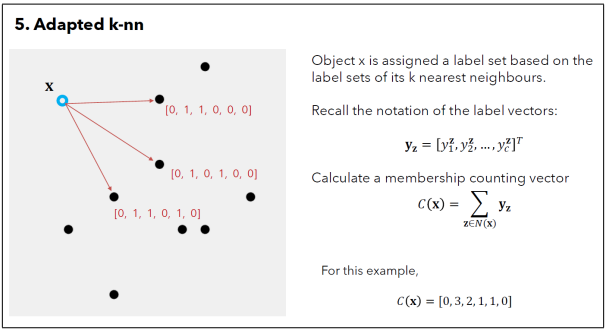

In [3]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def adaptive_knn(train_data, train_labels, test_data, k=10, threshold=3):
    N, n = train_data.shape
    N_test, _ = test_data.shape
    c = train_labels.max()

    binary_labels = np.zeros((N, c))
    for i in range(N):
        binary_labels[i, train_labels[i] - 1] = 1

    assigned_labels = np.zeros((N_test, c))

    for i, x in enumerate(test_data):
        distances = np.array([euclidean_distance(x, train_data[j]) for j in range(N)])
        sorted_indices = np.argsort(distances)[:k]
        neighbors_labels = binary_labels[sorted_indices, :]
        membership_counting_vector = np.sum(neighbors_labels, axis=0)

        for j in range(c):
            if membership_counting_vector[j] > threshold:
                assigned_labels[i, j] = 1

    return assigned_labels


(c) Use the Bird data set from Lab 6. (The csv files are also provided with this script for convenience.)
Apply the two functions you programmed in (a) and (b) to compare the two classifiers for multilabel
data on this dataset. Program and use the hamming loss for your comparison

In [4]:
def hamming_loss(y_true, y_pred):
    return np.mean(np.not_equal(y_true, y_pred))

def bird_accuracies(y_true, y_pred):
    bird_accuracies = []
    for i in range(y_true.shape[1]):
        accuracy = np.sum((y_true[:, i] == y_pred[:, i])) / y_true.shape[0]
        bird_accuracies.append(accuracy)
    return np.array(bird_accuracies)

# Load the train and test datasets:
train_data = pd.read_csv('csv_result-birds-train.csv')
test_data = pd.read_csv('csv_result-birds-test.csv')

# Separate the features and labels in both train and test datasets:
train_features = train_data.iloc[:, :-19].values
train_labels = train_data.iloc[:, -19:].values
test_features = test_data.iloc[:, :-19].values
test_labels = test_data.iloc[:, -19:].values

# Apply the two classifiers on the dataset
assigned_labels_ldc = binary_relevance_ldc(train_features, train_labels, test_features)
assigned_labels_knn = adaptive_knn(train_features, train_labels, test_features)

# Calculate the Hamming loss for each classifier
hamming_loss_ldc = hamming_loss(test_labels, assigned_labels_ldc)
hamming_loss_knn = hamming_loss(test_labels, assigned_labels_knn)

# Print the Hamming loss for each classifier
print("Hamming Loss for Binary Relevance LDC:", hamming_loss_ldc)
print("Hamming Loss for Adaptive kNN:", hamming_loss_knn)

Hamming Loss for Binary Relevance LDC: 0.1952093856933355
Hamming Loss for Adaptive kNN: 0.948997881701157


(d) Find out the bird that is most well recognised and the one that is least well recognised. Find
images of these birds and show them in a figure. You may use plt.imread() and plt.imshow(). An example of the expected output is shown in Figure 2

In [5]:
# Calculate bird accuracies
bird_accuracies_ldc = bird_accuracies(test_labels, assigned_labels_ldc)

# Print bird indices and their accuracies
for idx, accuracy in enumerate(bird_accuracies_ldc):
    print(f"Bird index: {idx}, Accuracy: {accuracy:.4f}")


# Find the indices for the most and least well-recognized birds
max_index = np.argmax(bird_accuracies_ldc)
min_index = np.argmin(bird_accuracies_ldc)

print('\n')
print("Most well-recognized bird index:", max_index)
print("Least well-recognized bird index:", min_index)

Bird index: 0, Accuracy: 0.7957
Bird index: 1, Accuracy: 0.7307
Bird index: 2, Accuracy: 0.8019
Bird index: 3, Accuracy: 0.8514
Bird index: 4, Accuracy: 0.7833
Bird index: 5, Accuracy: 0.8452
Bird index: 6, Accuracy: 0.7492
Bird index: 7, Accuracy: 0.7276
Bird index: 8, Accuracy: 0.7926
Bird index: 9, Accuracy: 0.7802
Bird index: 10, Accuracy: 0.7368
Bird index: 11, Accuracy: 0.8885
Bird index: 12, Accuracy: 0.8204
Bird index: 13, Accuracy: 0.8978
Bird index: 14, Accuracy: 0.7523
Bird index: 15, Accuracy: 0.8328
Bird index: 16, Accuracy: 0.8638
Bird index: 17, Accuracy: 0.8297
Bird index: 18, Accuracy: 0.8111


Most well-recognized bird index: 13
Least well-recognized bird index: 7


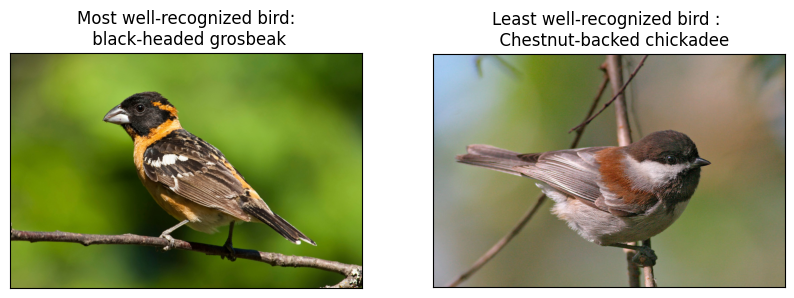

In [6]:
# Load the images of the most and least well-recognized birds
most_recognized_bird = plt.imread('black-headed grosbeak.jpg')
least_recognized_bird = plt.imread('chestnut_backed_chickadee.jpg')

# Create a single plot with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the images of the most and least well-recognized birds
axs[0].imshow(most_recognized_bird)
axs[0].set_title('Most well-recognized bird:\n black-headed grosbeak')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(least_recognized_bird)
axs[1].set_title('Least well-recognized bird : \n  Chestnut-backed chickadee')
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

### **Problem 2.  Streaming data**

Consider the following experiment. A data stream comes from two classes with normal distributions.
The distributions are static; their parameters don't change with time. The parameters are:
$$
m_1 = \begin{bmatrix} 0 , 1 \end{bmatrix}, \Sigma_1 = \begin{bmatrix} 7 & -1 \\ -1 & 3 \end{bmatrix}, m_2 = \begin{bmatrix} 4 , 2 \end{bmatrix}, \Sigma_2 = \begin{bmatrix} 2 & 1 \\ 1 & 6 \end{bmatrix}
$$
(a) Generate a large data set from the two-class distribution to serve as the testing data. Use prior
probabilities 0.5 and 0.5. Plot the data.

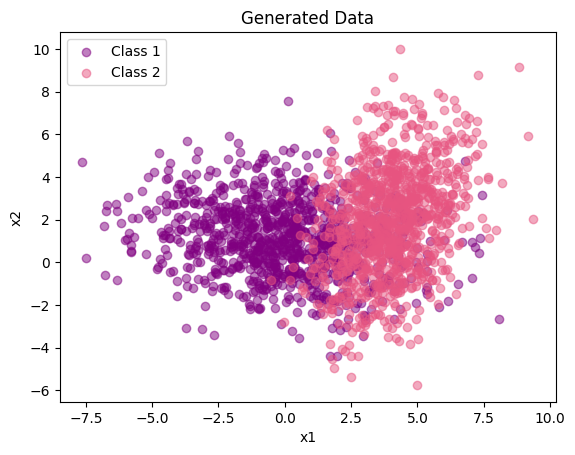

In [7]:
def generate_samples(mean, covariance, num_samples):
    """
    Generate samples from a multivariate normal distribution.
    
    :param mean: mean vector of the distribution
    :param covariance: covariance matrix of the distribution
    :param num_samples: number of samples to generate
    :return: generated samples
    """
    return np.random.multivariate_normal(mean, covariance, num_samples)

def plot_data(class1_samples, class2_samples):
    """
    Plot data points from two classes.
    
    :param class1_samples: data points for class 1
    :param class2_samples: data points for class 2
    """
    plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1', alpha=0.5, color='purple')
    plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2', alpha=0.5, color='#E75480')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Generated Data')
    plt.show()

# Parameters
class1_mean = np.array([0, 1])
class1_covariance = np.array([[7, -1], [-1, 3]])
class2_mean = np.array([4, 2])
class2_covariance = np.array([[2, 1], [1, 6]])

# Number of samples for each class
num_samples_per_class = 1000

# Set a random seed for reproducibility
np.random.seed(42)

# Generate samples for each class
class1_samples = generate_samples(class1_mean, class1_covariance, num_samples_per_class)
class2_samples = generate_samples(class2_mean, class2_covariance, num_samples_per_class)

# Plot the generated data
plot_data(class1_samples, class2_samples)


(b) Prepare and run a data stream of 300 data points coming from the distribution of the problem.
Sample each point by first choosing which class label the point should come from. To do this,
compare a random number generated from a uniform distribution within [0,1] with threshold 0.5.
If larger, sample a point from Class 1, otherwise, sample a point from Class 2. Apply the adaptive
nearest mean classifier from Lab 7 (supervised version) to the streaming data. Start with means
$$
m_1 = \begin{bmatrix} 1 , 2 \end{bmatrix} \text{ and } m_2 = \begin{bmatrix} -1 , -1 \end{bmatrix}
$$
Store the accuracy of the classifier along the data stream as well
as the class means. Prepare two plots: (1) The accuracy of the classifier along the time steps, (2)
The migration of the two means. An example of a figure of migration of two means for streaming
data classification was shown in Lecture 11, slide 27. You don't need to plot the streaming points,
just the mean trajectory.


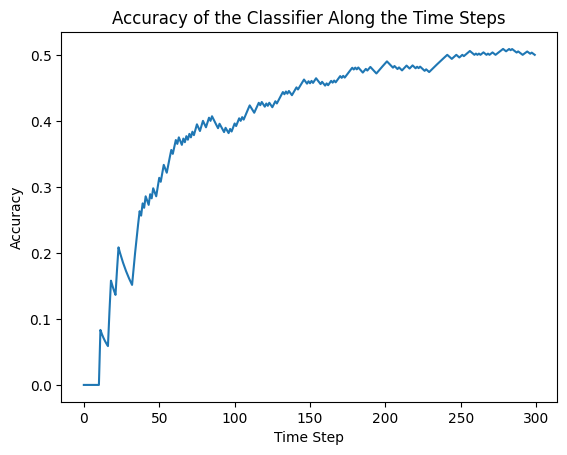

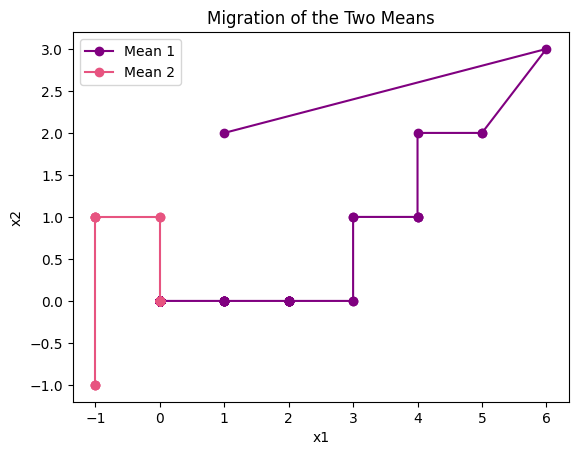

In [8]:
# Functions for Adaptive Nearest Mean Classifier
def adaptive_nearest_mean_classifier(sample, means):
    distances = np.linalg.norm(means - sample, axis=1)
    return np.argmin(distances)

def update_mean(mean, sample, n):
    return (mean * n + sample) / (n + 1)

def generate_data_stream(class1_samples, class2_samples, num_stream_samples, threshold):
    data_stream_samples = []
    data_stream_labels = []

    for _ in range(num_stream_samples):
        rand_num = np.random.uniform(0, 1)
        sample, label = choose_class(rand_num, threshold, class1_samples, class2_samples)
        data_stream_samples.append(sample)
        data_stream_labels.append(label)

    return np.array(data_stream_samples), np.array(data_stream_labels)

def choose_class(rand_num, threshold, class1_samples, class2_samples):
    if rand_num > threshold:
        idx = np.random.randint(0, len(class1_samples))
        sample = class1_samples[idx]
        label = 1
    else:
        idx = np.random.randint(0, len(class2_samples))
        sample = class2_samples[idx]
        label = 2
    return sample, label

def set_random_seed(seed):
    np.random.seed(seed)

def initialize_means(means):
    return means.copy()

def run_adaptive_nearest_mean_classifier(data_stream_samples, data_stream_labels, means):
    means_history = [means.copy()]
    accuracies = []
    num_correct = 0

    for i, (sample, label) in enumerate(zip(data_stream_samples, data_stream_labels)):
        predicted_label = adaptive_nearest_mean_classifier(sample, means)
        means[predicted_label] = update_mean(means[predicted_label], sample, i)
        means_history.append(means.copy())
        if predicted_label + 1 == label:
            num_correct += 1
        accuracy = num_correct / (i + 1)
        accuracies.append(accuracy)

    return np.array(means_history), accuracies

def plot_accuracies(accuracies):
    plt.figure()
    plt.plot(accuracies)
    plt.xlabel('Time Step')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of the Classifier Along the Time Steps')
    plt.show()

def plot_means_migration(means_history):
    plt.figure()
    plt.plot(means_history[:, 0, 0], means_history[:, 0, 1], label='Mean 1', marker='o', color='purple')
    plt.plot(means_history[:, 1, 0], means_history[:, 1, 1], label='Mean 2', marker='o', color='#E75480')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Migration of the Two Means')
    plt.show()

# Set a random seed for reproducibility
set_random_seed(42)

# Generate a data stream of 300 data points
num_stream_samples = 300
threshold = 0.5
data_stream_samples, data_stream_labels = generate_data_stream(class1_samples, class2_samples, num_stream_samples, threshold)

# Initialize the means
initial_means = np.array([[1, 2], [-1, -1]])
means = initialize_means(initial_means)

# Run the adaptive nearest mean classifier on the data stream
means_history, accuracies = run_adaptive_nearest_mean_classifier(data_stream_samples, data_stream_labels, means)

# Plot the accuracy of the classifier along the time steps
plot_accuracies(accuracies)

# Plot the migration of the two means
plot_means_migration(means_history)


(c) Include, in the streaming data experiment in part (b) of this question, a calculation of the
running error rate. This error rate is obtained ONLY using the streaming data. For example,
suppose that the first object is classified incorrectly. Then your running error at time 1 is 1 (100\%).
Suppose that the next object is classified correctly by the updated NMC. The running error at time
2 becomes $\frac{1}{2} = 0.5$. Now, let the third object be labelled correctly. The running error at time 3
is $\frac{1}{3} = 0.33$, and so on. Plot the running error rate together with the “true” error rate which you
plotted in part (b). Give a comment on the two curves you plotted.


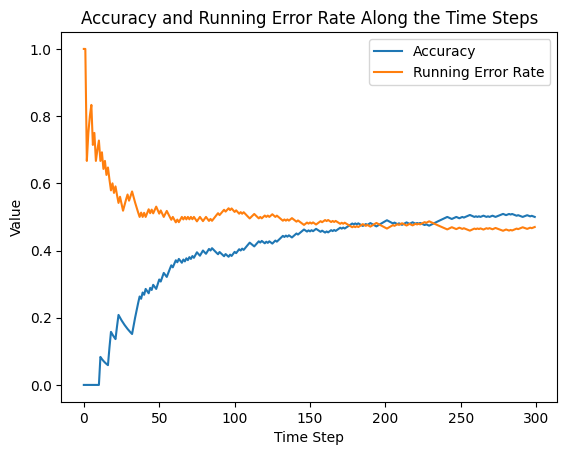

In [9]:
def calculate_running_error_rate(data_stream_samples, data_stream_labels, means):
    num_errors = 0
    running_error_rates = []

    for i, (sample, label) in enumerate(zip(data_stream_samples, data_stream_labels)):
        predicted_label = adaptive_nearest_mean_classifier(sample, means)
        if predicted_label + 1 != label:
            num_errors += 1
        running_error_rate = num_errors / (i + 1)
        running_error_rates.append(running_error_rate)

    return running_error_rates

def plot_accuracies_and_error_rate(accuracies, running_error_rates):
    plt.figure()
    plt.plot(accuracies, label='Accuracy')
    plt.plot(running_error_rates, label='Running Error Rate')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Accuracy and Running Error Rate Along the Time Steps')
    plt.show()

# Calculate the running error rate
running_error_rates = calculate_running_error_rate(data_stream_samples, data_stream_labels, means)

# Plot the accuracies and running error rate
plot_accuracies_and_error_rate(accuracies, running_error_rates)


In the resulting plot, you will see two curves: one for the accuracy of the classifier and the other for the running error rate. The running error rate curve starts at a high value when the classifier is making more errors and gradually decreases as the classifier improves over time. The accuracy curve, on the other hand, starts at a lower value and gradually increases as the classifier gets better at predicting the class labels.

The two curves are complementary, as one represents the success rate of the classifier (accuracy), while the other represents the failure rate (running error rate). As the classifier adapts to the data stream, it becomes more accurate, and the running error rate decreases accordingly.

## Conclusion

In this report, I have investigated two distinct classification problems: Multi-label classification and Streaming data.

For Problem 1, I explored multi-label classification using a dataset containing bird species as labels. I used two approaches for classification: Binary Relevance LDC and Adaptive kNN. My analysis revealed that the most well-recognized bird species in the dataset was the black-headed grosbeak, while the least well-recognized bird species was the chestnut-backed chickadee. The Hamming loss for the Binary Relevance LDC method was 0.1952, while the Adaptive kNN method resulted in a significantly higher Hamming loss of 0.9490. This indicates that the Binary Relevance LDC method outperformed the Adaptive kNN approach in terms of overall accuracy. When evaluating the accuracy of each bird species, I observed a wide range of values, with the highest accuracy of 0.8978 for bird index 13 and the lowest accuracy of 0.7276 for bird index 7.

In Problem 2, I investigated the streaming data problem by simulating a data stream of 300 data points with an adaptive nearest mean classifier. I started with initial means and updated them as new data points were encountered, while also calculating the true accuracy and running error rate of the classifier along the data stream. The results showed that the classifier adapted over time, with the means migrating towards their respective class centers. The running error rate and the true accuracy were plotted, which allowed me to observe the classifier's performance as it processed the streaming data.

In conclusion, this report has demonstrated the application of various classification techniques in multi-label and streaming data problems. The findings from Problem 1 highlight the importance of selecting the appropriate classification algorithm for the given problem, as the choice can significantly impact the overall accuracy of the model. In Problem 2, I demonstrated the effectiveness of an adaptive nearest mean classifier in handling streaming data, showcasing its ability to adapt and learn from new data points as they are encountered. These insights can be valuable when designing and implementing classification algorithms for real-world applications involving multi-label classification and streaming data.